# MACHINE LEARNING WITH PYTHON, MAJOR PROJECT(MARCH-APRIL)

(MADE BY : N DEEPIKA)

In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\hp\Downloads\Womens_Clothing_E_Commerce_Reviews.csv' )

In [2]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
data.shape

(23486, 11)

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
data.columns=['Clothing_ID','Age','Title','Review_Text','Rating','Recommended_IND','Pos_Feedback_Count','Division_Name','Department_Name','Class_Name']

In [6]:
data.dtypes

Clothing_ID            int64
Age                    int64
Title                 object
Review_Text           object
Rating                 int64
Recommended_IND        int64
Pos_Feedback_Count     int64
Division_Name         object
Department_Name       object
Class_Name            object
dtype: object

# DATA DESCRIPTION

*There are 234866 rows and 10 columns.*


About columns:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

In [7]:
data.describe()

,Clothing_ID,Age,Rating,Recommended_IND,Pos_Feedback_Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
#finding Null columns in the data
data.isnull().sum()

Clothing_ID              0
Age                      0
Title                 3810
Review_Text            845
Rating                   0
Recommended_IND          0
Pos_Feedback_Count       0
Division_Name           14
Department_Name         14
Class_Name              14
dtype: int64

In [9]:
data.shape

(23486, 10)

In [10]:
cloth_data=data.copy()

# DATA CLEANING

In [11]:
pd.isna(data['Review_Text']).sum()

845

In [12]:

#Drop all empty reviews
data_temp = data.dropna(subset=['Review_Text','Department_Name', 'Division_Name', 'Class_Name'])

In [13]:
import numpy as np
df=pd.DataFrame(data)
#Data Left 
data_temp.shape[0] /df.shape[0]

0.9634675977177893

In [14]:
#Reset index
data_index = data_temp.reset_index()

In [15]:
#Check for empty reviews
for i in range(data_index.shape[0]):
    if pd.isna(data_index['Review_Text'][i]) == True:
        print(i)

In [16]:
#Store reviews in list
review_text = np.array(data_index['Review_Text'])

#Make all entires lower case
for i in range(len(review_text)):
    review_text[i] = review_text[i].lower()

#Store department in list
department = np.array(data_index['Department_Name'])

# CHANGING THE RATINGS TO BAD/GOOD

*Rating <=3 ,then it is bad*
*otherwise it is good*

In [17]:
data['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [18]:
event_dict={1:'Bad',2:'Bad',3:'Bad',4:'Good',5:'Good'}
data['Class'] = data['Rating'].map(event_dict)

In [19]:
data.head(22641)

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Pos_Feedback_Count,Division_Name,Department_Name,Class_Name,Class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Bad
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good
...,...,...,...,...,...,...,...,...,...,...,...
22636,1081,40,NaN,NaN,5,1,0,General,Dresses,Dresses,Good
22637,886,42,Buy this top!!,"I love everything about this top. first, it's ...",5,1,1,General Petite,Tops,Knits,Good
22638,895,40,Picture doesn't do it justice,I think this shawl is much more stunning on th...,4,1,5,General,Tops,Fine gauge,Good
22639,862,35,NaN,NaN,5,1,0,General Petite,Tops,Knits,Good


# DATA ANALYSIS

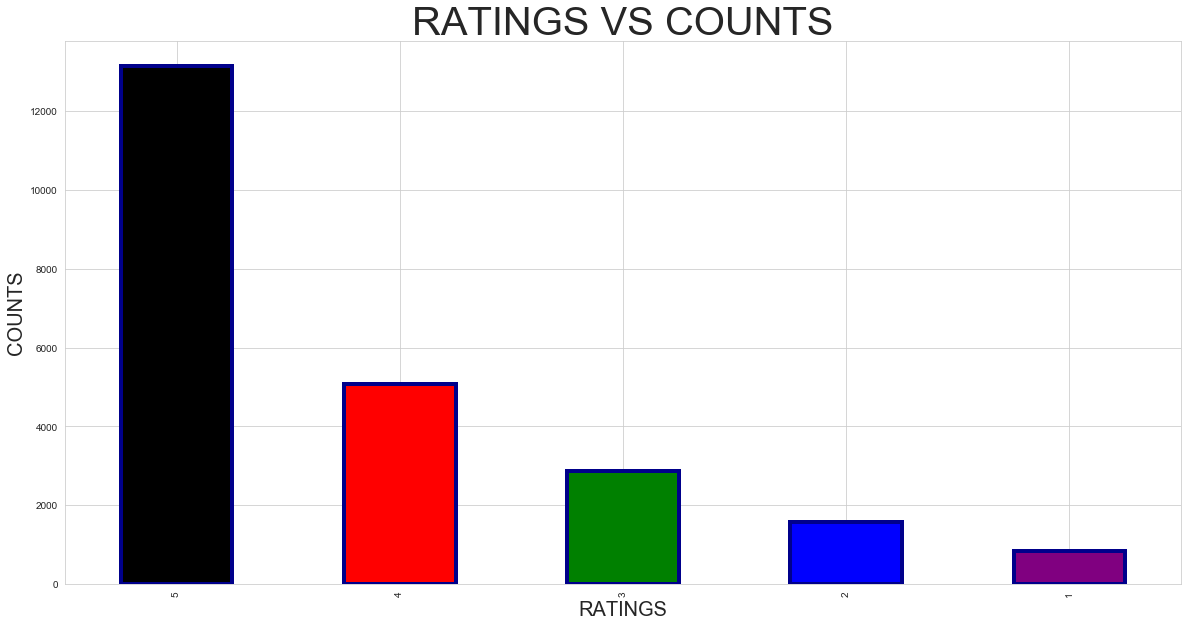

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline


plt.rcParams["figure.figsize"]=(20,10)
data.Rating.value_counts()[:20].plot(kind='bar',color = ['black','red','green','blue','purple'], alpha =1, linewidth=4, edgecolor='darkblue')

plt.ylabel('COUNTS',fontsize=20)
plt.xlabel('RATINGS',fontsize=20)
plt.title('RATINGS VS COUNTS',fontsize=40)
plt.show()

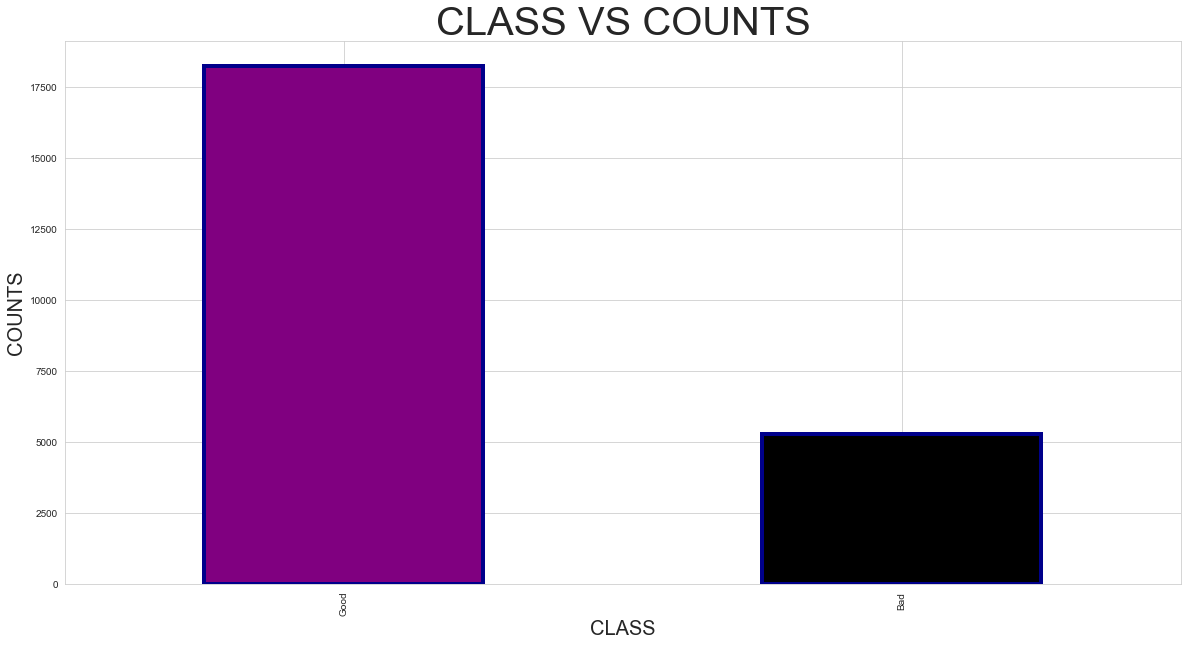

In [21]:
plt.rcParams["figure.figsize"]=(20,10)
data.Class.value_counts()[:20].plot(kind='bar',color = ['purple','black'], alpha =1, linewidth=4, edgecolor='darkblue')

plt.ylabel('COUNTS',fontsize=20)
plt.xlabel('CLASS',fontsize=20)
plt.title('CLASS VS COUNTS',fontsize=40)
plt.show()

# Let's see which item is been reviewed most

In [22]:
data.groupby(['Clothing_ID']).Clothing_ID.agg({'count'}).reset_index().sort_values(by='count',ascending=False)[:15]

,Clothing_ID,count
1078,1078,1024
862,862,806
1094,1094,756
1081,1081,582
872,872,545
829,829,527
1110,1110,480
868,868,430
895,895,404
936,936,358


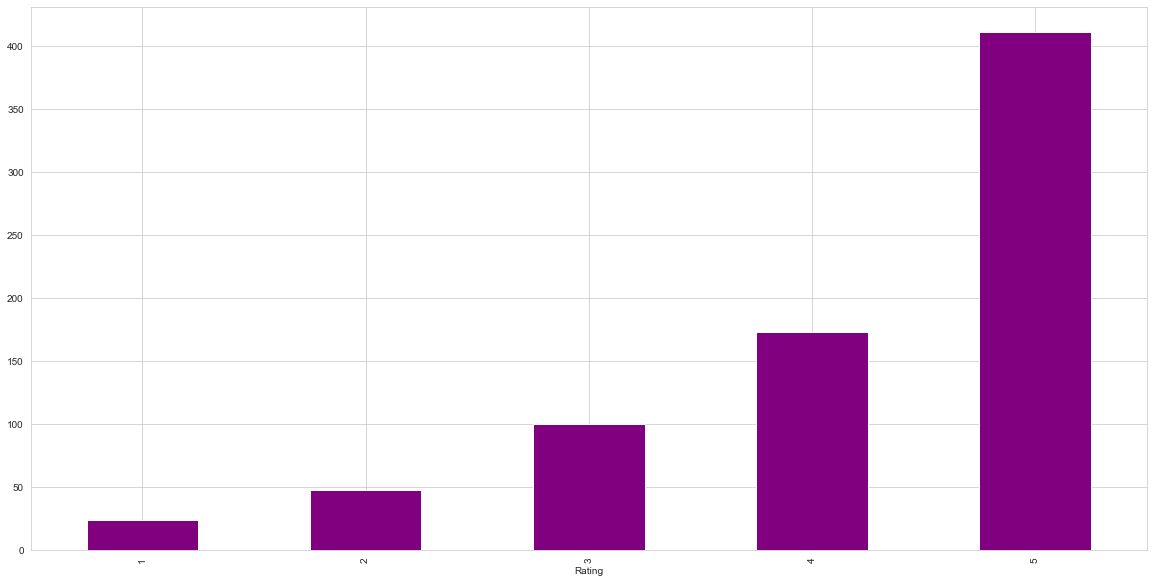

In [23]:
data[data.Clothing_ID==1094].groupby(['Rating']).Rating.count().plot(kind='bar',color={'purple'})

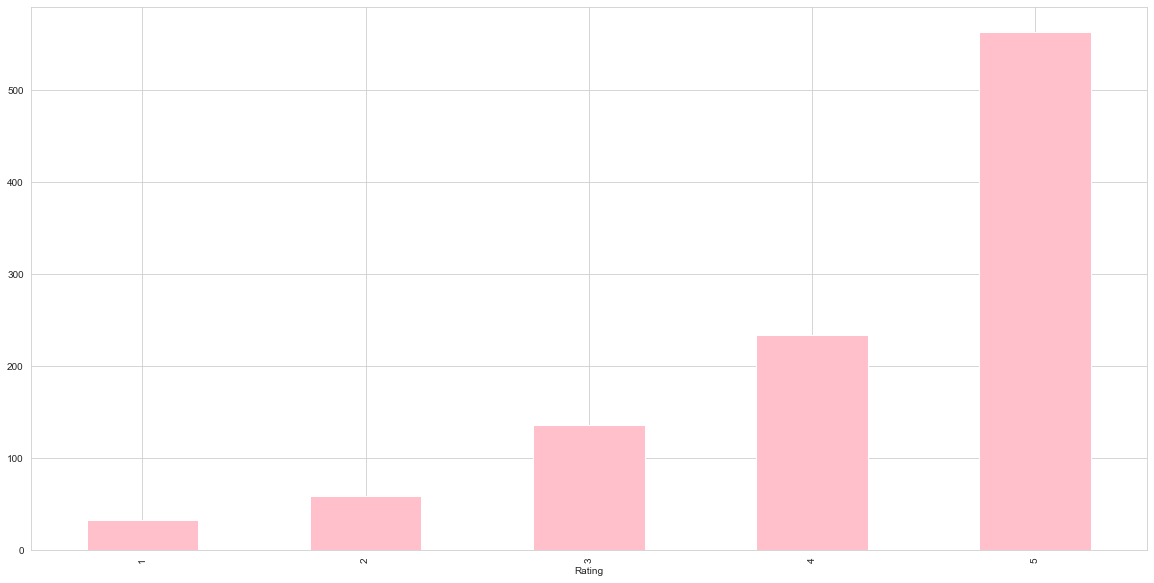

In [24]:
data[data.Clothing_ID==1078].groupby(['Rating']).Rating.count().plot(kind='bar',color={'pink'})

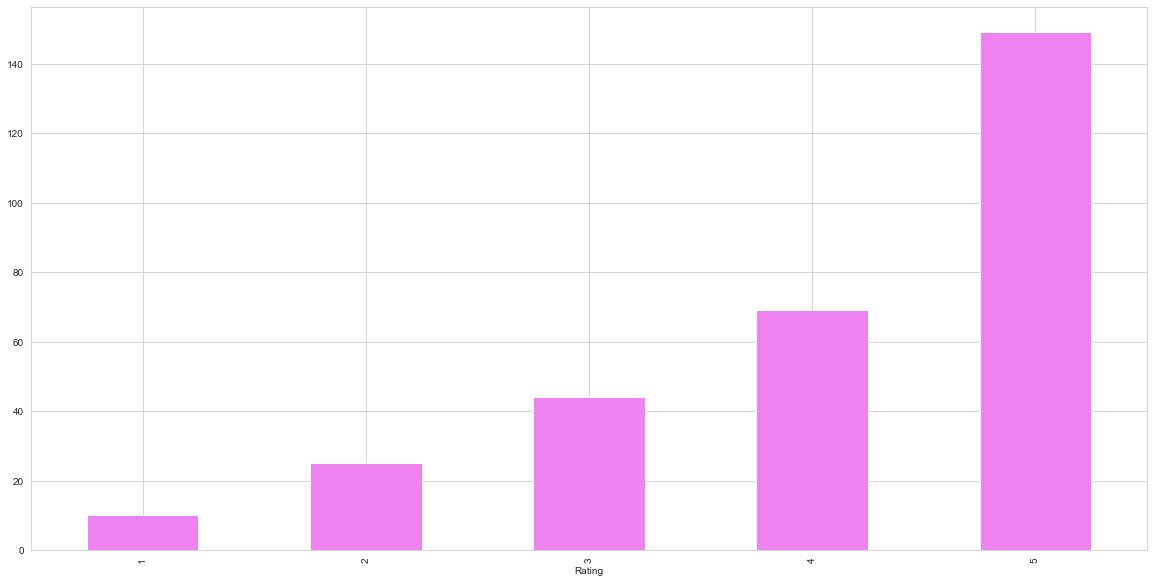

In [25]:
data[data.Clothing_ID==1077].groupby(['Rating']).Rating.count().plot(kind='bar',color={'violet'})

In [26]:
#PRODUCT HAVING HIGHEST NO. OF GOOD/BAD REVIEWS
data[data.Class=='Good'].groupby(['Clothing_ID']).Clothing_ID.agg({'count'}).reset_index().sort_values(by='count',ascending=False)[:15]

,Clothing_ID,count
963,1078,796
758,862,627
979,1094,584
966,1081,471
768,872,459
726,829,406
995,1110,377
788,895,323
764,868,295
827,936,285


In [27]:
data[data.Class=='Bad'].groupby(['Clothing_ID']).Clothing_ID.agg({'count'}).reset_index().sort_values(by='count',ascending=False)[:15]

,Clothing_ID,count
509,1078,228
325,862,179
525,1094,172
331,868,135
297,829,121
512,1081,111
540,1110,103
526,1095,88
335,872,86
330,867,84


# VISUALISATION

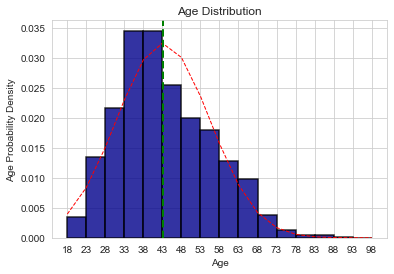

In [28]:
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline 

df=pd.DataFrame(data)
#Create bin to store ages
age_bin= np.arange(18, 100, 5)
#Average age
age_avg = np.average(df['Age'])
#age standard devation
age_std = np.std(df['Age'])

#Create histogram
plt.hist(df['Age'], bins = age_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='darkblue', density= 1)

#Add a fit
y = norm.pdf( age_bin, age_avg, age_std)
l = plt.plot(age_bin, y, 'r--', linewidth=1)

#Set x axis ticks to match bins
plt.xticks(age_bin)

#Add labels and title
plt.xlabel("Age")
plt.ylabel("Age Probability Density")
plt.title("Age Distribution")

#Add average line
plt.axvline(age_avg, color='green', linestyle = 'dashed', linewidth= 2)

#Use grey background
plt.style.use('bmh')

#Display histogram
plt.show()

From the graph we can see that age groups between 33-38,38-43 has given the highest reviews

In [29]:
data.columns

Index(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Pos_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name', 'Class'],
      dtype='object')

In [30]:
data[(data.Class=='Bad') & (data.Recommended_IND==1)][['Class','Recommended_IND']].count()

Class              1299
Recommended_IND    1299
dtype: int64

In [31]:
Rec_List=pd.DataFrame(columns=['Class','Ind1_Count','Ind0_Count'])
Rc_list=[]
for i in list([[1,0,'Good'],[1,0,'Bad']]):
    Rc_list.append([i[2],data[(data.Class==i[2]) & (data.Recommended_IND==int(i[0]))]['Class'].count(),data[(data.Class==i[2]) & (data.Recommended_IND==int(i[1]))]['Class'].count()])
Rec_List= Rec_List.append(pd.DataFrame(Rc_list,columns=['Class','Ind1_Count','Ind0_Count']),ignore_index=True)    

In [32]:
Rec_List

,Class,Ind1_Count,Ind0_Count
0,Good,18015,193
1,Bad,1299,3979


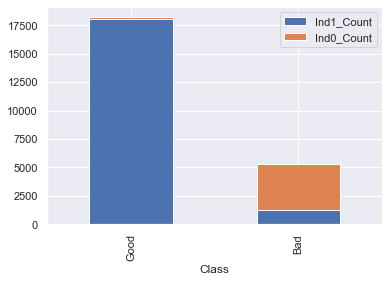

In [33]:
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
sns.set()
Rec_List[['Class','Ind1_Count','Ind0_Count']].set_index('Class').plot(kind='bar',stacked=True)

When recommended indicator is 1,the good reviews are the highest and if the recommendation indicator is 0 it is most likely to be bad review

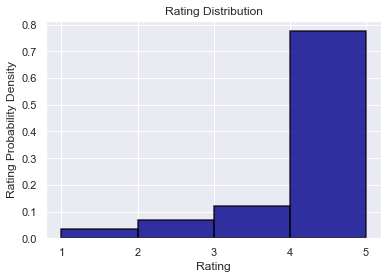

In [34]:
#Create bin for rating
rating_bin = np.arange(1, 6, 1)

#Create histogram
plt.hist(df['Rating'], bins = rating_bin, alpha = 0.8, edgecolor='black', linewidth =1.5, color ='darkblue', density= 1)

#Add labels and title
plt.xlabel("Rating")
plt.ylabel("Rating Probability Density")
plt.title("Rating Distribution")

#Set x axis ticks to match bins
plt.xticks(rating_bin)

plt.show()

In [35]:
#Create wedges and corresponding labels for column in dataframe.
def NameCount (df_in, column):
    #Store unique entries 
    names = df_in[column].unique()
    #remove nans
    names = [x for x in names if str(x) != 'nan']
    #Create array to store values
    count = np.empty(len(names))
    #Store recurrence of each value
    for i in range(len(names)):
        count[i] = df[(df[column] == names[i])].shape[0]
    return names, count

#Division
div_name, div_count = NameCount(df, 'Division_Name')
#Department 
dep_name, dep_count = NameCount(df, 'Department_Name')
#Class
class_name, class_count = NameCount(df, 'Class_Name')

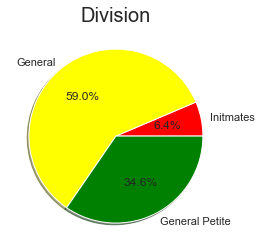

In [36]:
plt.pie(div_count, labels=div_name,colors={'red','green','yellow'}, autopct='%1.1f%%', shadow=True, radius= 1)
plt.title("Division", fontsize = 20)
plt.show()

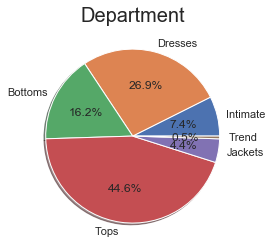

In [37]:

plt.pie(dep_count, labels=dep_name, autopct='%1.1f%%', shadow=True, radius= 1)
plt.title("Department", fontsize = 20)
plt.show()

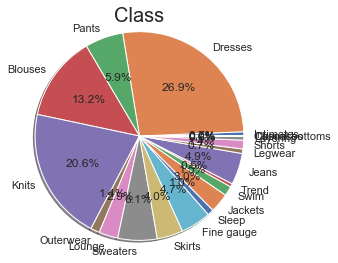

In [38]:
plt.pie(class_count, labels=class_name, autopct='%1.1f%%', shadow=True, radius= 1.2)
plt.title("Class", loc = 'center', fontsize = 20)
plt.show()

# TEXT PREPROCESSING

*Analyze the text comment/review* 

In [51]:
#text preprocessing starts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 

from nltk.stem import WordNetLemmatizer
woednet_Lemmatizer = WordNetLemmatizer()
set(stopwords.words('english'))
sno=nltk.stem.SnowballStemmer('english')
#function to clean the word of any html-tags
def cleanhtml(sentence):
    cleaner=re.compile('<.*?>')
    clntxt = re.sub(cleaner,'',sentence)
    return clntxt
#function to clean the word of any punctuation or special characters
def cleanpunc(sentence):
    cleaned= re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned= re.sub(r'[.|,|)|(|\|/]',r'',sentence)
    return cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [53]:
from tqdm import tqdm
all_pos_words=[]
all_neg_words=[]
for i,sent in enumerate(tqdm(data['Review_Text'].values)):
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for words in sent.split():
        for cleaned_words in cleanpunc(words).split():
            if((cleaned_words.isalpha())&(len(cleaned_words)>2)):
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
    str1=b" ".join(filtered_sentence)
    final_string.append(str1)
    
data['cleanedtext']=final_string
data['cleanedtext']=data['cleanedtext'].str.decode("utf-8")

connt=sqlite3.connect('cleaned_final.sqlite')
c=connt.cursor()
connt.text_factory= str
data.to_sql('Reviews',connt,schema=None,if_exists='replace',index=True,index_label=None,chunksize=None,dtype=None)
final=pd.read_sql_query(conn)
connt.close()

  0%|                                                                                        | 0/23486 [00:00<?, ?it/s]


TypeError: argument of type 'WordListCorpusReader' is not iterable

In [41]:
len(review_text)

22628

In [42]:

#Create the metric space by extracting all the words, unique and duplicate, from the review text.
#The text is already lower case from section 3.0

#Create an empty array to store in the words
all_words = []

#Store all the words
for i in range(len(review_text)):
    wordlist = re.sub("[^\w]", " ", str(review_text[i])).split()
    for j in range (len(wordlist)):
        all_words.append(wordlist[j])

#Drop the duplicates and make it iterable
all_words = list(set(all_words))
#Create the feature space


n_observations = len(review_text)
n_features = len(all_words)
#Feature matrix
feat_mat = np.zeros((n_features, n_observations))





In [43]:
feat_mat.shape


(14182, 22628)

In [44]:
#Populate the feature matrix
for i in range (n_observations):
    wordlist = re.sub("[^\w]", " ", str(review_text[i])).split()
    for j in range(len(wordlist)):
        feat_mat[all_words.index(wordlist[j]), i] += 1

# WORD CLOUD

In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud

In [48]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path

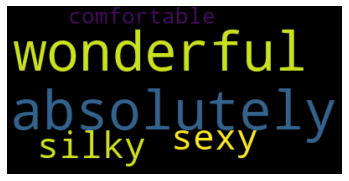

In [49]:
#Try on the first review
word_cloud_0 = WordCloud(background_color="black", max_font_size= 100).generate(review_text[0])
#Display the image
plt.imshow(word_cloud_0, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
#Combine all the reviews into one massive string
review_text_combined = " ".join(review for review in review_text)
print ("There are {} words in the combination of all reviews.".format(len(review_text_combined)))

There are 7006071 words in the combination of all reviews.


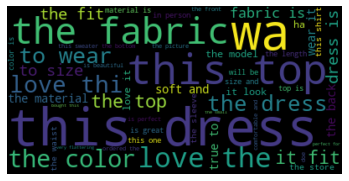

In [51]:
# Create stopword list:
stopwords = set(STOPWORDS)
#For now let's only remove the
stopwords.update(["the"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black", 
                      width= 400, height = 200, 
                      max_words=50).generate(review_text_combined)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# SENTIMENT ANALYSIS

In [52]:
#Define a list of positive expressions
pos_word = ['love', 'good', 'great', 'amazing', 'super', 'smooth', 'fits', 'nice', 'perfect', 'cute', 'recommend',
           'like']

In [53]:
#Define a list of negative words
neg_word = ['hate', 'bad', 'horrible', 'big', 'small', 'rough', 'ugly', 'itch', 'expensive', 'scratch', 'never',
           'dislike', 'ill', 'poor', 'smelly']

In [54]:
#Create a list that will record sentiment.
# Add one if positive and substract one if negative.
sentiments = np.zeros(len(review_text))

In [55]:
#Start by adding scores
for j in range(len(pos_word)):
#Iterate over every positive word
    for i in range (len(review_text)):
    #Divide the string into a list of words in case one positive word is used more than once
        sep_words = re.sub("[^\w]", " ", str(review_text[i])).split()
        #Compare word for word if the sentiment is good
        for k in range(len(sep_words)):
            if pos_word[j] == sep_words[k]:
                sentiments[i] += 1

In [56]:
#Check the overall sentiment after positives
np.mean(sentiments)

1.7752784161216193

In [57]:
#Repeat some thing but now negative words
#Start by adding scores

for j in range(len(neg_word)):
#Iterate over every positive word
    for i in range (len(review_text)):
    #Divide the string into a list of words in case one negative word is used more than once
        sep_words = re.sub("[^\w]", " ", str(review_text[i])).split()
        #Compare word for word if the sentiment is good
        for k in range(len(sep_words)):
            if neg_word[j] == sep_words[k]:
                sentiments[i] -= 1

In [58]:
#Check the overall sentiment after negatives
np.mean(sentiments)

1.424076365564787

In [59]:
#Store the review score in array
review_score = np.array(data_index['Rating'])

In [60]:
len(review_score)

22628

In [61]:
len(sentiments)

22628

In [62]:

#Create review bin
rate_1 = []
rate_2 = []
rate_3 = []
rate_4 = []
rate_5 = []

In [63]:
feel_score = 0

for i in range (len(review_text)):
    #Divide the string into a list of words in case one positive word is used more than once
    sep_words = re.sub("[^\w]", " ", str(review_text[i])).split()
    #Compare word for word if the sentiment is good
    for k in range(len(sep_words)):
        for j in range(len(neg_word)):
            if neg_word[j] == sep_words[k]:
                feel_score -= 1
        for m in range(len(pos_word)):
            if pos_word[m] == sep_words[k]:
                feel_score += 1
    #Normalize the feel score over the length of the review
    feel_score = feel_score/len(sep_words)
    if review_score[i] == 1:
         rate_1.append(feel_score)
    elif review_score[i] == 2:
        rate_2.append(feel_score)
    elif review_score[i] == 3:
        rate_3.append(feel_score)
    elif review_score[i] == 4:
        rate_4.append(feel_score)
    elif review_score[i] == 5:
        rate_5.append(feel_score)
    #reset feel score for next iteration
    feel_score = 0

In [64]:

#Store sentimetns in array
feels_tick = np.array([rate_1, rate_2, rate_3, rate_4, rate_5])

In [65]:
feels_mean = []
for i in range(len(feels_tick)):
    feels_mean.append(np.mean(feels_tick[i]))

In [66]:
feels_mean

[0.012846657211981288,
 0.014502126680206324,
 0.016790097117915407,
 0.02682085053805027,
 0.03820055760794544]

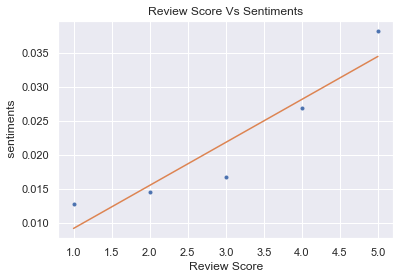

In [67]:
from numpy.polynomial.polynomial import polyfit

#fit the data
b, m = polyfit(x = rating_bin, y = feels_mean, deg= 1)

#Draw a scatter plot
plt.plot(rating_bin, feels_mean, '.')
#draw the fit
plt.plot(rating_bin, b + m * rating_bin, '-')

#Add labels and title
plt.xlabel("Review Score")
plt.ylabel(" sentiments")
plt.title("Review Score Vs Sentiments")
plt.show()

As expected, review score is positively correlated to positive sentiment.
Note that even among very low reviews, the sentiment is still positive which means that our negative words list is probably defficient. It could also mean that those who love a product can be more verbose if asked to describe their experience.

# modeling

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test= train_test_split([['review_text','Recommended_IND']], test_size=0.2)

ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
#Vectorize text
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [106]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_transformer = TfidfTransformer()
tf_idf_vect= TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect.fit_transform(x_train['review_text'])
final_tf_idf=tf_idf_vect.transform(['review_text'].values)
print(final_tf_idf.get_shape())
print(final_tf_idf.get_shape()[1])


**********************************************************************
  Resource wordnet not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('wordnet')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load corpora/wordnet

  Searched in:
    - 'C:\\Users\\hp/nltk_data'
    - 'C:\\Users\\hp\\anaconda3\\nltk_data'
    - 'C:\\Users\\hp\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\hp\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)